# 04 - Logistic Regression
---

### **Introduction**
With standard linear regression we are attempting to predict a continuous target variable as a linear combination of the predictors. However with logistic regression we are attempting to predict a binary outcome. This could be for example whether or not a customer will churn or if a particular treatment will be effective for a patient. In linear regression we try to predict the target continuous value directly whereas in logistic regression we do not try to predict the binary class directly. Instead, we try to predict the probability the outcome falls into one of the two classes. Using an above example, we are not trying to predict if the treatment will be effective or not, but rather the probability it will be effective. This is a subtle difference but has implications in terms of how the model is constructed. 

### **Assumptions**
We make the following assumptions when modelling a binary outcome with logisitic regression:

1. **Log-Odds Linearity**: The log-odds is a linear combination of the predictors $log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p$

2. **Independent Observations**:  The observations $(x_i, y_i)$ are independent accross $i$

3. **Bernoulli Target**: The target comes from a Bernoulli distribution $y_i \sim Bernoulli(p_i)$ 

4. **No Perfect Multicollinearity**: The predictors are not perfectly linearly dependent. That is, no predictor is a perfect linear combination of the others

5. **No Perfect Separation**: There does not exist a linear combination of the predictors which perfectly separates the two classes

Independent observations is not the same as independent predictors which is not assumed. 

### **Log-Odds Linearity**
As disucssed previously, we are not trying to model $y_i$ directly but rather the probability of the 'positive' class $p = \mathbb{P}(y=1|x)$. Since this is a probability, $p \in [0, 1]$ but if we model $p$ as a linear combination of the predictors we have a problem. Namely, this linear combination is unbounded $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p \in (-\infty, \infty)$ 

So our goal is to find a transformation  $\text f(p): [0, 1] \rightarrow (-\infty, \infty)$. By doing so we can then model the  tranformed probability $\text f(p) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p$. That is as a linear combination the predictors.   

To understand this transformation, we first define the **odds**. For a probability $p$:

$\text odds(p) = \frac{p}{1-p}$

It can be thought of as the fair market price you would recieve when placing a bet. For instance the chance you get heads on a fair coin is $\frac{1}{2}$ which would result in odds of $\frac{\frac{1}{2}}{1-\frac{1}{2}} = 1$ - i.e. evens. Similarly the chance you roll a 6 on a fair die is $\frac{1}{6}$ which would result in odds of $\frac{\frac{1}{6}}{1-\frac{1}{6}} = 0.2$ - i.e. 5:1. 

Now, the odds $\frac{p}{1-p} \in (0, \infty)$   
However $log(\frac{p}{1-p}) \in (-\infty, \infty)$

This function $log(\frac{y}{1-y}) = x$ or equivalently $f(x) = \frac{1}{1+e^{-x}}$ is called the **sigmoid function**. 

See the graph below for a visualisation of $\frac{p}{1-p} \in (0, \infty)$ and $log(\frac{p}{1-p}) \in (-\infty, \infty)$. 

Hence we can model the log-odds a linear combination of the predictors:
$log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p$
where $p = \mathbb{P}(y=1|x)$ is the probability of the 'positive' class. 

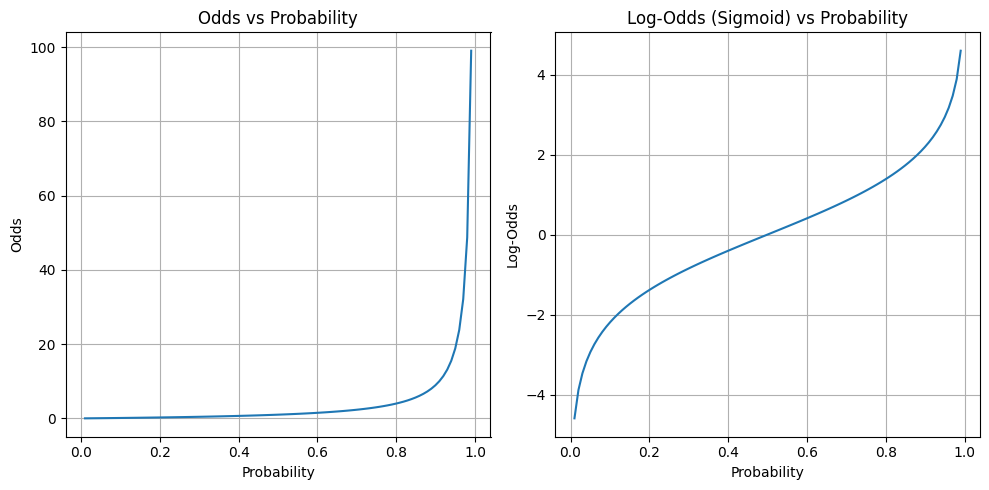

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of probabilities from 0 to 1
x = np.linspace(0.01, 0.99, 98)  # Avoid 0 and 1 to prevent division by zero

# Calculate the odds and log-odds
odds = x / (1 - x)
log_odds = np.log(odds)

# Plot Odds and Log-Odds against Probability
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, odds)
plt.title('Odds vs Probability')
plt.xlabel('Probability')
plt.ylabel('Odds')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(x, log_odds)
plt.title('Log-Odds (Sigmoid) vs Probability')
plt.xlabel('Probability')
plt.ylabel('Log-Odds')
plt.grid()
plt.tight_layout()
plt.show()  

### **Independent Observations & Bernoulli Target**
Refer to the I.I.D. Observations section in 02 - Linear Regression for a discussion of independence. Note that the combination assumptions 2 + 3 can be combined into $y_i \stackrel{\text{i.i.d.}}{\sim} Bernoulli(p_i)$. 

To understand the loss function, recall that we aim to find the parameters $\beta_0, \cdots, \beta_k$ which best estimate $p_i = \mathbb{P}(y_i=1|x_i)$. The parameters which best achieve this are the ones which maximise the likelihood of observing the given data. This is known as **maximum likelihood estimation**.    
Now since $y_i \stackrel{\text{i.i.d.}}{\sim} Bernoulli(p_i)$ we can write that the likelihood of observing the given data as

$\mathbb{P}(y|x) = L(\beta) = \prod_{i}^{}p_i^{y_i}(1-p_i)^{1-y_i}$

Indeed the independence allows us to take the product. 

If we have a very large dataset, this product may become extremely small and we may run into computatinal underflow issues where the result is too small to be represented by a computer. To get around this problem, we model the log-likelihood which turns the product into a sum.

$\mathcal{L}(\beta) = log(L(\beta)) = \sum_{i}^{} y_i \log(p_i) + (1-y_i) \log(1-p_i)$

Finally, many optimisation algorithms such as gradient decent work my minimisation rather than maximisation. To be able to resuse these engins, we swap the sign of the log-likelihood to make it the negative log-likelihood and set the goal to minimisation. This is exactly equivalent to maximising the log-likelihood. The negative log-likelihood is called the **cross-entropy** and is the loss function for logistic regression. 

### **No Perfect Multicollinearity**
Refer to the corresponding assumption in 02 - Linear Regression for further details.

### **No Perfect Separation**
Perfect separation is where there exists a line (2-dimensions), plane (3-dimensions) or surface (higher-dimensions) which perfectly divides the two classes. Formally, there exists some $\beta$ such that:
- $x_i^T\beta > 0$ for all $y_i = 1$
- $x_i^T\beta < 0$ for all $y_i = 0$

This causes a problem due to the nature of maximum likelihood estimation. The estimation algorithm can always choose larger values for the parameters $\beta$ which increase the likelihood of the observed data. Thus there is no finite maximum; the optimisation algorithm diverges. 

**L2 regularisation** is a technique to help prevent perfect separation. It works by adding a term to the loss function which penalises large coefficients. So the loss function becomes:

$\mathcal{L}(\beta) + \lambda ||\beta||^2$
where $||\beta||^2 = \sqrt{\beta_0^2 + \cdots + \beta_k^2}$ is the **Euclidean distance** which essentially is the magnitude of the parameters and $\lambda$ is a scaling factor called the **regularisation parameter** which controls the strength of the regularisation. 

L2 regularisation works by limiting the benefit the loss functions get by increasing the magnitude of the coefficients. 